# READING TABULAR DATA FROM WIKIPEDIA
 The following is a list of the world's largest manufacturing companies, ordered by revenue in millions of U.S. dollars according to the Fortune Global 500. Currently the 50 biggest companies by revenue are included. https://en.wikipedia.org/wiki/List_of_largest_manufacturing_companies_by_revenue

## IMPORT REQUIRED LIBRARIES

In [1]:
import re
import requests
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', message='The frame.append method is deprecated and will be removed \
from pandas in a future version. Use pandas.concat instead.')

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_manufacturing_companies_by_revenue'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
#print(soup.prettify())

## GET THE CONTENTS FROM THE TABLE

In [4]:
#grab all the tables in the site
tables = soup.find_all('table')
print("We have: ",len(tables),"tables in our website","\n")

#select only the first table
rows = tables[0].find('tbody').find_all('tr')
print("All rows in the first table are; ",len(rows),"including the table header")

#print(rows)

We have:  6 tables in our website 

All rows in the first table are;  51 including the table header


In [5]:
columns=[v.text.replace('\n','') for v in rows[0].find_all('th')]
df=pd.DataFrame(columns=columns)

for i in range(1,len(rows)):
    tds=rows[i].find_all('td')
    if len(tds)==4:
        values=[tds[0].text,tds[1].text,"",tds[2].text,tds[3].text.replace('\n','').replace('\xa0','')]
    else:
        values=[td.text.replace('\n','').replace('\xa0','') for td in tds]
    df=df.append(pd.Series(values,index=columns),ignore_index=True)

df=df.append(pd.Series(values,index=columns),ignore_index=True)

## DATA EXPLORATION & CLEANING

In [6]:
df.head()

,No.,Company,Industry,Revenue (by US$ billion),Headquarters
0,1,Apple,"Electronics, telecommunications equipment",274.515,United States
1,2,Toyota Group,"Engineering, various",256.721,Japan
2,3,Volkswagen Group,Automotive,253.965,Germany
3,4,Samsung Electronics,"Electronics, various",200.734,South Korea
4,5,Foxconn,Electronics,181.945,Taiwan


In [7]:
df.shape

(51, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   No.                       51 non-null     object
 1   Company                   51 non-null     object
 2   Industry                  51 non-null     object
 3   Revenue (by US$ billion)  51 non-null     object
 4   Headquarters              51 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


## CLEANING THE DATASET

In [9]:
df["Revenue (by US$ billion)"]=df["Revenue (by US$ billion)"].str.replace(',','')
df["Revenue (by US$ billion)"]=df["Revenue (by US$ billion)"].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   No.                       51 non-null     object 
 1   Company                   51 non-null     object 
 2   Industry                  51 non-null     object 
 3   Revenue (by US$ billion)  51 non-null     float64
 4   Headquarters              51 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.1+ KB


## DATA VISUALISATION

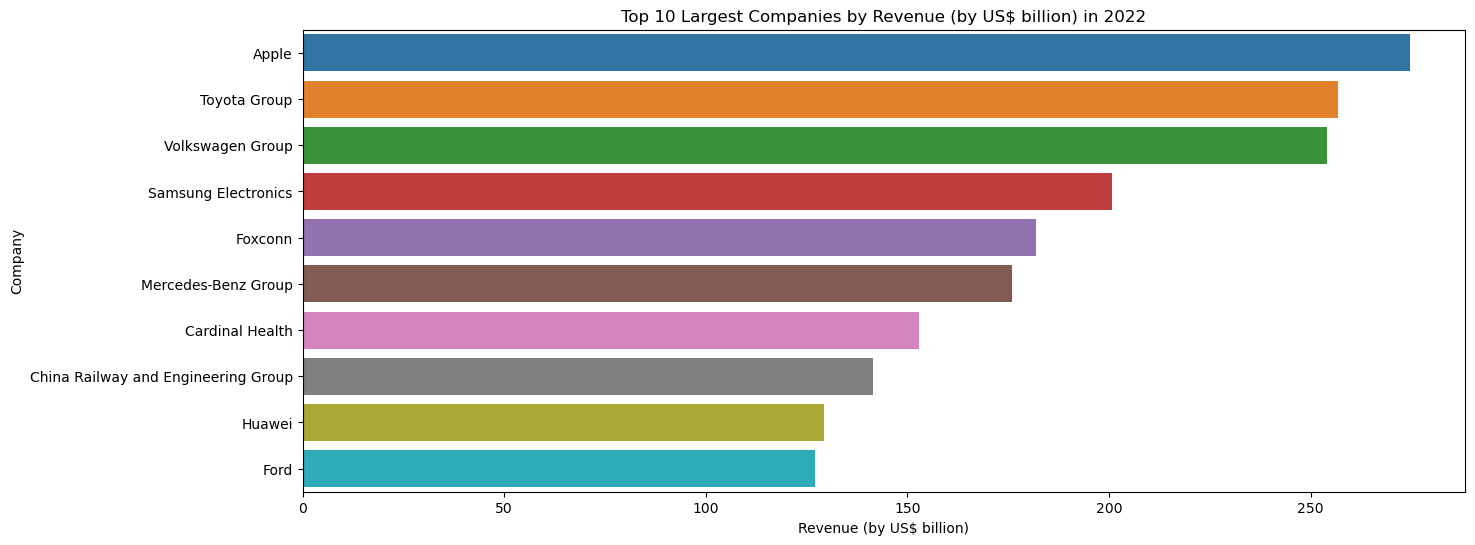

In [11]:
# Top 10 largest companies by Revenue (by US$ billion)
plt.figure(figsize=(15,6))
sns.barplot(y="Company",x="Revenue (by US$ billion)",data=df.iloc[:10,:],orient='h')
plt.title("Top 10 Largest Companies by Revenue (by US$ billion) in 2022")
plt.show()

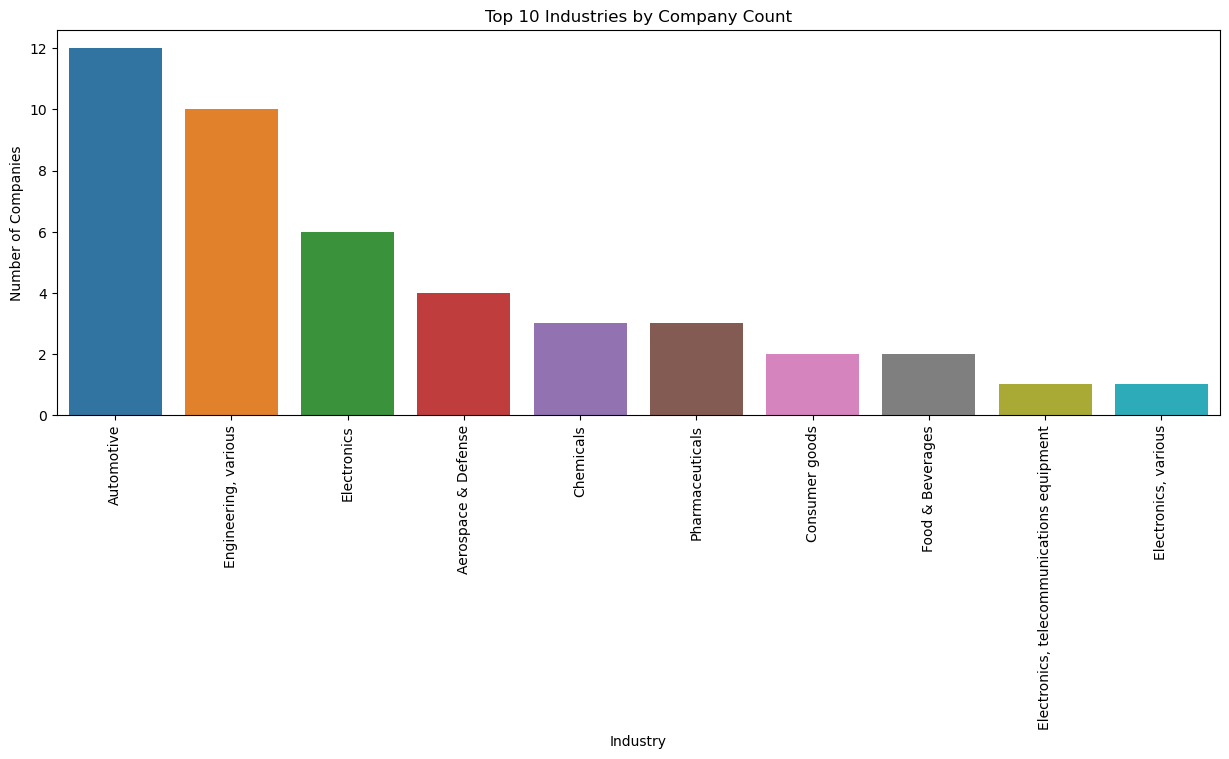

In [12]:
# Top 10 Industries based on the number of companies
top_industries = df.groupby("Industry", as_index=False).size().sort_values("size", ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x="Industry", y="size", data=top_industries)
plt.title("Top 10 Industries by Company Count")
plt.xlabel("Industry")
plt.ylabel("Number of Companies")
plt.xticks(rotation=90)
plt.show()

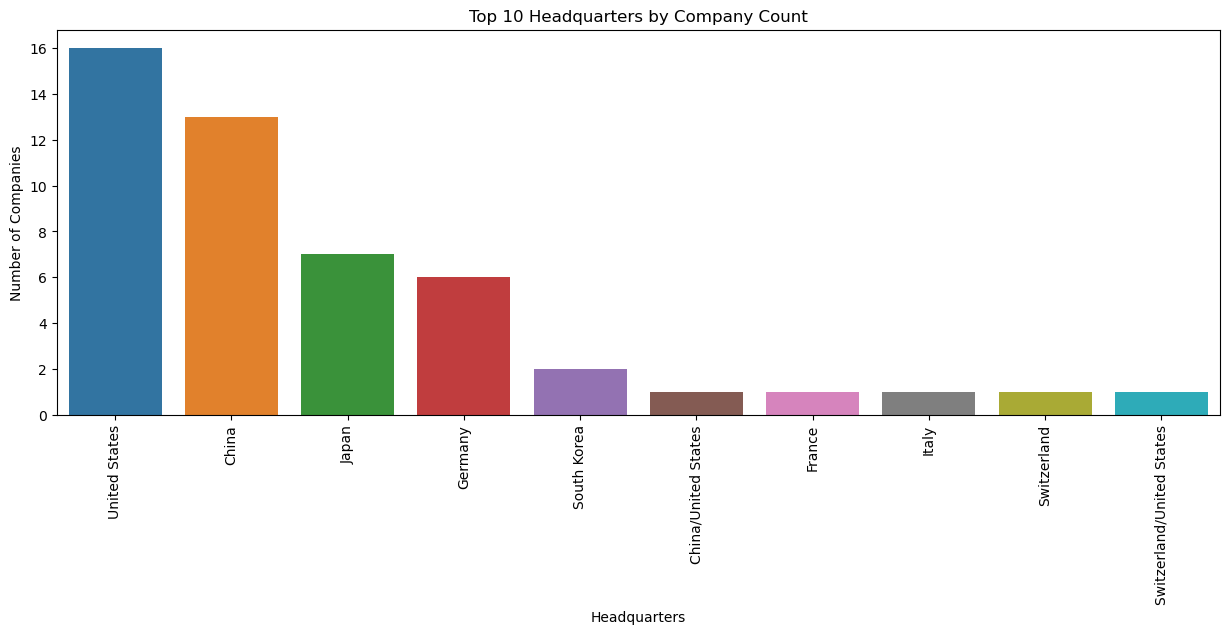

In [13]:
# Top 10 countries based on the number of companies
top_industries = df.groupby("Headquarters", as_index=False).size().sort_values("size", ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x="Headquarters", y="size", data=top_industries)
plt.title("Top 10 Headquarters by Company Count")
plt.xlabel("Headquarters")
plt.ylabel("Number of Companies")
plt.xticks(rotation=90)
plt.show()